In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
%matplotlib inline

line_markers = ['-.','-,','-o','-v','-^','-<','->','-1','-2','-3','-4','-s','-p','-*','-h','-H','-+','-x','-D','-d','-|','-_']
line_markers = ['*','h','<','4','x','d','|','_']

root = './prev_results/'

In [2]:
def accuracy(file_name, tasknum = 10):
    acc = np.zeros(tasknum)
    with open(file_name, 'r') as f:
        data = f.read().splitlines()
        for i in range(len(data)):
            acc[i] = data[i]
    return acc

In [3]:
def aupr_auroc_prev_new(result, idx, save=None):
    
    end = 5000 + 5000*(idx+1)
    fontsize = 15
    
    precision, recall, thresholds = precision_recall_curve(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    fpr, tpr, thresholds = roc_curve(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    aupr = average_precision_score(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    auroc = roc_auc_score(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])

    plt.figure(figsize = (20,5))

    plt.style.use('default')
    plt.subplot(1,4,1)
    plt.plot(recall, precision, linestyle='-', label='bin_prob')
    plt.grid(b=True, which='major', axis='both')
    plt.xlabel('Recall', fontsize=fontsize)
    plt.ylabel('Precision', fontsize=fontsize)
    plt.title('AURP: %.3f'%aupr, fontsize=fontsize)

    plt.style.use('default')
    plt.subplot(1,4,2)
    plt.plot(fpr, tpr, linestyle='-', label='bin_prob')
    plt.grid(b=True, which='major', axis='both')
    plt.xlabel('FPR', fontsize=fontsize)
    plt.ylabel('TPR', fontsize=fontsize)
    plt.title('AUROC: %.3f'%auroc, fontsize=fontsize)

    plt.style.use('default')
    plt.subplot(1,4,3)
    plt.plot(np.arange(end-5000), np.sort(result['bin_prob'][0][idx][0][:end-5000]), linestyle='-')
    plt.grid(b=True, which='major', axis='both')
    plt.ylabel('Confidence', fontsize=fontsize)
    plt.title('Prev class', fontsize=fontsize)

    plt.style.use('default')
    plt.subplot(1,4,4)
    plt.plot(np.arange(5000), np.sort(result['bin_prob'][0][idx][0][end-5000:end]), linestyle='-')
    plt.grid(b=True, which='major', axis='both')
    plt.ylabel('Confidence', fontsize=fontsize)
    plt.title('New class', fontsize=fontsize)


    print(np.mean(result['bin_prob'][0][idx][0][:end-5000]))
    print(np.mean(result['bin_prob'][0][idx][0][end-5000:end]))
    
    if save is not None:
        plt.tight_layout()
        plt.savefig('./figures/'+save+'.pdf')

[86 83 76 71 67 63 60 57 54 52]
64.77777777777777


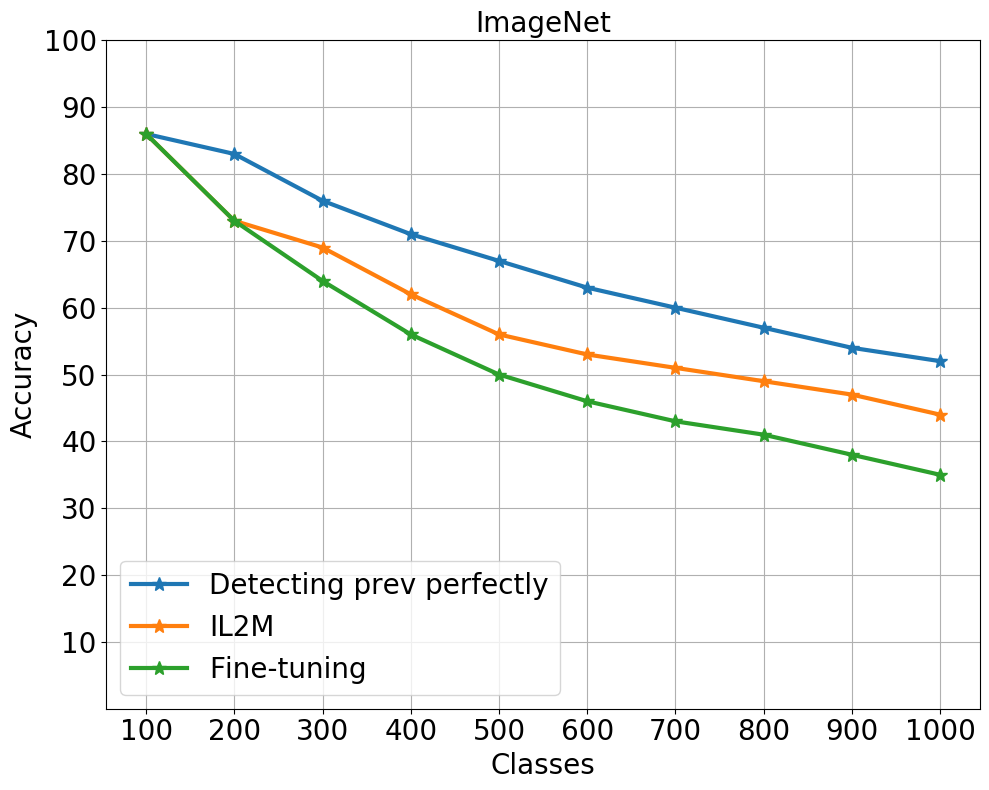

In [4]:
er_prev_new = np.array([86, 73, 66, 60, 57, 53, 51, 49, 47, 44])
er_prev_new_binary_100 = np.array([86, 83, 76, 71, 67, 63, 60, 57, 54, 52])
FT = np.array([86,73,64,56,50,46,43,41,38,35])
IL2M = np.array([86,73,69,62,56,53,51,49,47,44])
task = (np.arange(10) + 1)*100

plt.style.use('default')
plt.figure(figsize=(10,8))
plt.plot(task, er_prev_new_binary_100, linestyle='-', label='Detecting prev perfectly',marker = line_markers[0], linewidth=3, markersize=10)
plt.plot(task, IL2M, linestyle='-', label='IL2M',marker = line_markers[0], linewidth=3, markersize=10)
plt.plot(task, FT, linestyle='-', label='Fine-tuning',marker = line_markers[0], linewidth=3, markersize=10)

plt.grid(b=True, which='major', axis='both')
plt.xticks([100,200,300,400,500,600,700,800,900,1000], fontsize = 20)

plt.xlabel('Classes', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.ylim(0,100)
plt.yticks([10,20,30,40,50,60,70,80,90,100], fontsize = 20)
# plt.set_yticklabels(['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.title('ImageNet', fontsize = 20)
plt.legend(loc = 'lower left', fontsize=20)

print(er_prev_new_binary_100)
print(er_prev_new_binary_100[1:].sum()/9)

plt.tight_layout()
plt.savefig('./figures/FT_OOD.pdf')

In [5]:
# result = sio.loadmat('191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_64_batch_128_epoch_100_factor_4_RingBuffer.mat')
# print(result.keys())
# print('Batch: 128, Replay batch: 64, factor:4, uniform penalty')
# print('Cheat Top-1')
# print(result['cheat']['correct'][0][0][0])
# print('All Top-1')
# print(result['all']['correct'][0][0][0])
# print('Prev/new Top-1')
# print(result['prev_new']['correct'][0][0][0])
# print('Task Top-1')
# print(result['task']['correct'][0][0][0])

# print('Cheat Top-5')
# print(result['cheat']['correct_5'][0][0][0])
# print('All Top-5')
# print(result['all']['correct_5'][0][0][0])
# print('Prev/new Top-5')
# print(result['prev_new']['correct_5'][0][0][0])
# print('Task Top-5')
# print(result['task']['correct_5'][0][0][0])

# print('Sigmoid')
# print(result['sigmoid'][0])
# print('AUROC')
# print(result['auroc'][0])

# print('Stat')

# print('All')
# print(result['all']['stat'][0][0])
# print('Prev/new')
# print(result['prev_new']['stat'][0][0])
# print('Task')
# print(result['task']['stat'][0][0])
# print(result['task_soft_1'])

In [6]:
result = sio.loadmat(root+'FT_Imagenet_coreset_0_memsz_20000_alpha_1_base_100_replay_128_batch_128_epoch_100_factor_4_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 64, factor:4, uniform penalty')

print(result['stat'])
print(result['soft'])
for i in range(9):
    print(100*(result['stat'][i][0]+result['stat'][i][3])/result['stat'][i][6])


dict_keys(['__header__', '__version__', '__globals__', 'soft', 'stat', 'sigmoid', 'auroc', 'task_soft'])
Batch: 128, Replay batch: 64, factor:4, uniform penalty
[[ 3220   235  1545  4126   725   149 10000]
 [ 5512   850  3638  4185   712   103 15000]
 [ 7203  1462  6335  4178   705   117 20000]
 [ 8595  2213  9192  4149   718   133 25000]
 [ 9579  2884 12537  4227   671   102 30000]
 [11174  4202 14624  4225   630   145 35000]
 [12162  5034 17804  4281   605   114 40000]
 [12943  5343 21714  4158   727   115 45000]
 [13284  6167 25549  4336   549   115 50000]]
[[86 83 76 71 67 63 60 57 54 52]]
73.46
64.64666666666666
56.905
50.976
46.02
43.997142857142855
41.1075
38.00222222222222
35.24


In [7]:
result = sio.loadmat(root+'191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, uniform penalty, alpha: 1')

print('AUROC')
print(result['auroc'][0])

print(result['task_soft_1'])


dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, uniform penalty, alpha: 1
AUROC
[0.79523874 0.80691392 0.79799797 0.7896736  0.79050344 0.81842191
 0.80591812 0.79429603 0.81973715]
[[84.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [27. 79.  0.  0.  0.  0.  0.  0.  0.  0.]
 [20. 32. 80.  0.  0.  0.  0.  0.  0.  0.]
 [18. 27. 32. 79.  0.  0.  0.  0.  0.  0.]
 [16. 24. 26. 33. 78.  0.  0.  0.  0.  0.]
 [15. 21. 23. 24. 29. 80.  0.  0.  0.  0.]
 [12. 18. 20. 19. 22. 30. 81.  0.  0.  0.]
 [13. 17. 17. 19. 20. 26. 30. 81.  0.  0.]
 [12. 15. 16. 18. 18. 24. 24. 34. 79.  0.]
 [13. 14. 18. 16. 18. 21. 22. 26. 32. 83.]]


In [40]:
result = sio.loadmat(root+'191212_Imagenet_ood_0_memsz_20000_alpha_2.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, uniform penalty, alpha: 2')

print('AUROC')
print(result['auroc'][0])

print(result['task_soft_1'])

idx = 7
end = 5000 + 5000*(idx+1)

precision, recall, thresholds = precision_recall_curve(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
fpr, tpr, thresholds = roc_curve(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
aupr = average_precision_score(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
auroc = roc_auc_score(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
plt.style.use('default')
plt.figure(figsize=(8,5))
plt.plot(recall, precision, linestyle='-', label='bin_prob')
plt.grid(b=True, which='major', axis='both')
plt.xlabel('Recall', fontsize=30)
plt.ylabel('Precision', fontsize=30)
plt.title('AURP: %.3f'%aupr)

plt.style.use('default')
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, linestyle='-', label='bin_prob')
plt.grid(b=True, which='major', axis='both')
plt.xlabel('FPR', fontsize=30)
plt.ylabel('TPR', fontsize=30)
plt.title('AUROC: %.3f'%auroc)

print(np.sum(result['bin_prob'][0][idx][0][:end-5000])/(end-5000))
print(np.sum(result['bin_prob'][0][idx][0][end-5000:end])/(5000))

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, uniform penalty, alpha: 2
AUROC
[0.85102954 0.85456243 0.84464181 0.83008721 0.83691766 0.84641093
 0.85087445]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [45. 84.  0.  0.  0.  0.  0.  0.  0.  0.]
 [35. 44. 84.  0.  0.  0.  0.  0.  0.  0.]
 [35. 37. 48. 84.  0.  0.  0.  0.  0.  0.]
 [31. 32. 33. 48. 84.  0.  0.  0.  0.  0.]
 [27. 30. 31. 40. 48. 84.  0.  0.  0.  0.]
 [23. 27. 27. 34. 37. 50. 85.  0.  0.  0.]
 [22. 23. 24. 31. 33. 39. 52. 86.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


IndexError: index 7 is out of bounds for axis 0 with size 7

In [9]:
result = sio.loadmat(root+'191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_32_batch_128_epoch_100_factor_2_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:2, uniform penalty, alpha: 1')

print('AUROC')
print(result['auroc'][0])

print('Stat')

print(result['task_soft_1'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:2, uniform penalty, alpha: 1
AUROC
[0.82104956 0.83904413 0.82802417 0.81182659 0.81427331 0.83846401
 0.82986088 0.81816689 0.8332454 ]
Stat
[[84.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [25. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [17. 27. 83.  0.  0.  0.  0.  0.  0.  0.]
 [17. 22. 29. 82.  0.  0.  0.  0.  0.  0.]
 [17. 19. 21. 27. 82.  0.  0.  0.  0.  0.]
 [15. 15. 17. 21. 26. 83.  0.  0.  0.  0.]
 [12. 13. 13. 15. 17. 27. 84.  0.  0.  0.]
 [11. 10. 13. 14. 17. 22. 30. 84.  0.  0.]
 [ 8.  9. 11. 13. 11. 17. 22. 29. 82.  0.]
 [ 8.  7. 11. 12.  9. 15. 17. 20. 30. 86.]]


In [10]:
result = sio.loadmat(root+'191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_64_batch_128_epoch_100_factor_4_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 64, factor:4, uniform penalty, alpha: 1')

print('AUROC')
print(result['auroc'][0])

print('Stat')

print(result['task_soft_1'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 64, factor:4, uniform penalty, alpha: 1
AUROC
[0.78794534 0.80191243 0.79542467 0.78531324 0.78512995 0.81463047
 0.80689506 0.796426   0.81585807]
Stat
[[84.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [26. 79.  0.  0.  0.  0.  0.  0.  0.  0.]
 [18. 32. 80.  0.  0.  0.  0.  0.  0.  0.]
 [18. 28. 32. 78.  0.  0.  0.  0.  0.  0.]
 [15. 22. 25. 32. 79.  0.  0.  0.  0.  0.]
 [13. 21. 22. 24. 30. 81.  0.  0.  0.  0.]
 [11. 17. 19. 20. 22. 31. 82.  0.  0.  0.]
 [12. 15. 18. 19. 22. 26. 30. 81.  0.  0.]
 [11. 14. 15. 19. 19. 24. 24. 34. 79.  0.]
 [10. 14. 16. 19. 19. 22. 22. 27. 33. 83.]]


In [11]:
result = sio.loadmat(root+'191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_64_batch_128_epoch_100_factor_2_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 64, factor:2, uniform penalty, alpha: 1')

print('AUROC')
print(result['auroc'][0])

print('Stat')

print(result['task_soft_1'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 64, factor:2, uniform penalty, alpha: 1
AUROC
[0.81699562 0.83170221 0.82617098 0.81445093 0.81267615 0.83535474
 0.82607253 0.81438429 0.8346273 ]
Stat
[[84.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [27. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [19. 29. 83.  0.  0.  0.  0.  0.  0.  0.]
 [19. 23. 29. 82.  0.  0.  0.  0.  0.  0.]
 [17. 20. 19. 28. 82.  0.  0.  0.  0.  0.]
 [15. 16. 16. 23. 26. 83.  0.  0.  0.  0.]
 [13. 15. 15. 18. 19. 30. 85.  0.  0.  0.]
 [10. 12. 13. 15. 16. 22. 28. 84.  0.  0.]
 [ 9. 10. 11. 12. 13. 20. 21. 29. 82.  0.]
 [ 7.  9. 11. 10. 11. 15. 18. 22. 31. 86.]]


In [12]:
result = sio.loadmat(root+'191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_32_batch_128_epoch_100_factor_1_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:1, uniform penalty, alpha: 1')

print('AUROC')
print(result['auroc'][0])

print('Stat')

print(result['task_soft_1'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:1, uniform penalty, alpha: 1
AUROC
[0.84223966 0.85243327 0.84340571 0.82968711 0.8279548 ]
Stat
[[84.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [26. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [16. 23. 85.  0.  0.  0.  0.  0.  0.  0.]
 [12. 15. 24. 84.  0.  0.  0.  0.  0.  0.]
 [11. 12. 14. 24. 83.  0.  0.  0.  0.  0.]
 [11. 10. 12. 16. 21. 85.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [13]:
result = sio.loadmat(root+'191212_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_32_batch_128_epoch_100_factor_1_RingBuffer_rand_init.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:1, uniform penalty, alpha: 1, rand_init')

print('AUROC')
print(result['auroc'][0])

print('Stat')

print(result['task_soft_1'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:1, uniform penalty, alpha: 1, rand_init
AUROC
[0.84265338 0.85497494]
Stat
[[84.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [27. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [12. 19. 85.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [14]:
result = sio.loadmat(root+'191224_Imagenet_ood_0_memsz_20000_alpha_2.0_base_100_replay_128_batch_128_epoch_100_factor_4_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:1, uniform penalty, alpha: 2')

print('AUROC')
print(result['auroc'][0])

print('Stat')

print(result['task_soft_1'])

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:1, uniform penalty, alpha: 2
AUROC
[0.79176598 0.81106535]
Stat
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [33. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [22. 34. 83.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, uniform penalty, CI_loss, alpha: 2
AUROC
[0.854252   0.85588696 0.85024982 0.83161681]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [30. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [19. 29. 83.  0.  0.  0.  0.  0.  0.  0.]
 [19. 21. 32. 82.  0.  0.  0.  0.  0.  0.]
 [17. 16. 17. 30. 83.  0.  0.  0.  0.  0.]]
0.14602213
0.45930156


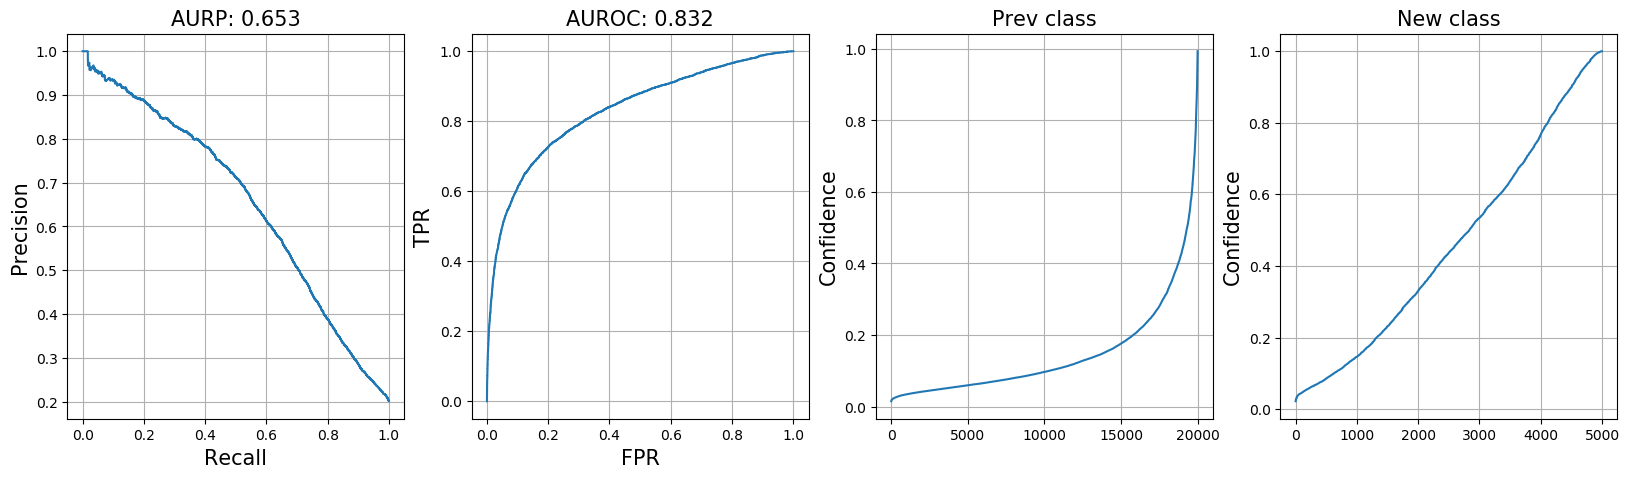

In [15]:
result = sio.loadmat(root+'CI_OOD_Imagenet_ood_0_memsz_20000_alpha_2.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, uniform penalty, CI_loss, alpha: 2')

idx = 3

print('AUROC')
print(result['auroc'][0])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, uniform penalty, CI loss, alpha: 2, beta: 1
AUROC
[0.84944118 0.8575353  0.84907289]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [31. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [21. 31. 82.  0.  0.  0.  0.  0.  0.  0.]
 [19. 22. 33. 82.  0.  0.  0.  0.  0.  0.]]
0.20396669
0.5848314


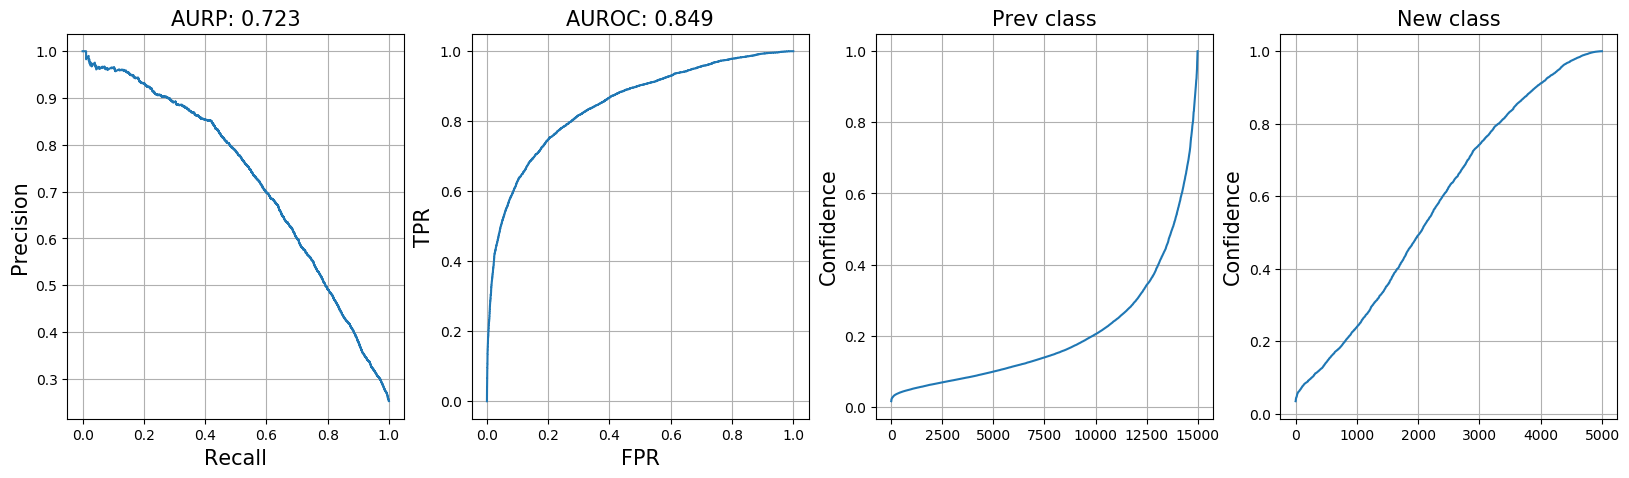

In [16]:
result = sio.loadmat(root+'191225_Imagenet_ood_0_memsz_20000_alpha_2.0_beta_1.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, uniform penalty, CI loss, alpha: 2, beta: 1')

idx = 2

print('AUROC')
print(result['auroc'][0])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, uniform penalty, CI loss, alpha: 3
AUROC
[0.85491076 0.85575079 0.84995634]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [27. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [16. 27. 83.  0.  0.  0.  0.  0.  0.  0.]
 [16. 19. 30. 82.  0.  0.  0.  0.  0.  0.]]
0.11953691
0.44948876


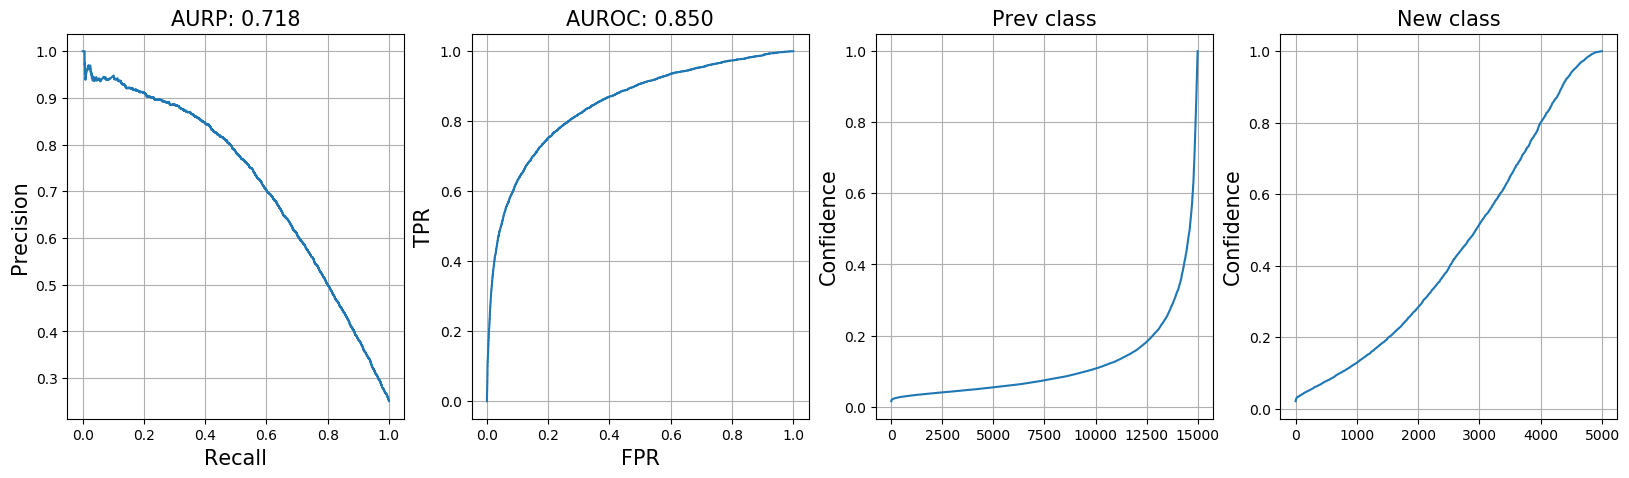

In [17]:
result = sio.loadmat(root+'191225_Imagenet_ood_0_memsz_20000_alpha_3.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, uniform penalty, CI loss, alpha: 3')

idx = 2

print('AUROC')
print(result['auroc'][0])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, uniform penalty, CI loss, alpha: 5
AUROC
[0.85766092 0.86096803 0.85577465]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [28. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [16. 26. 82.  0.  0.  0.  0.  0.  0.  0.]
 [14. 17. 28. 82.  0.  0.  0.  0.  0.  0.]]
0.08294429
0.39275712


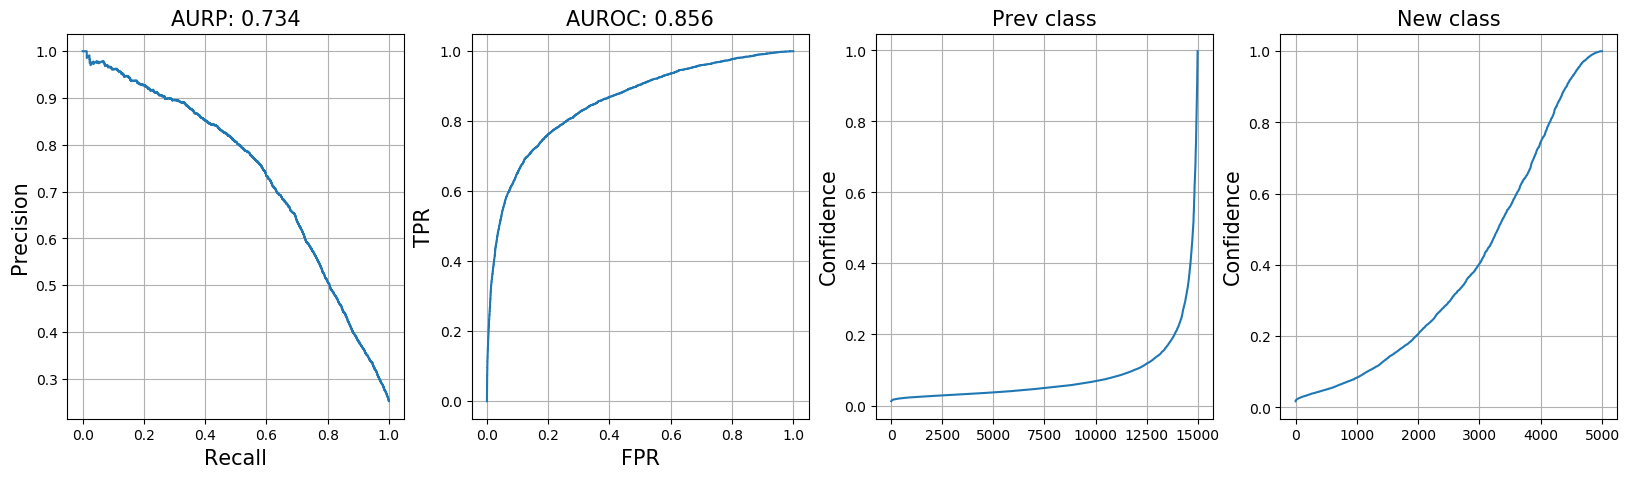

In [18]:
result = sio.loadmat(root+'191225_Imagenet_ood_0_memsz_20000_alpha_5.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, uniform penalty, CI loss, alpha: 5')

idx = 2

print('AUROC')
print(result['auroc'][0])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, uniform penalty, CI loss, alpha: 10
AUROC
[0.8530903  0.86008072 0.8517305 ]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [24. 81.  0.  0.  0.  0.  0.  0.  0.  0.]
 [14. 24. 81.  0.  0.  0.  0.  0.  0.  0.]
 [12. 16. 26. 81.  0.  0.  0.  0.  0.  0.]]
0.05179869
0.28859365


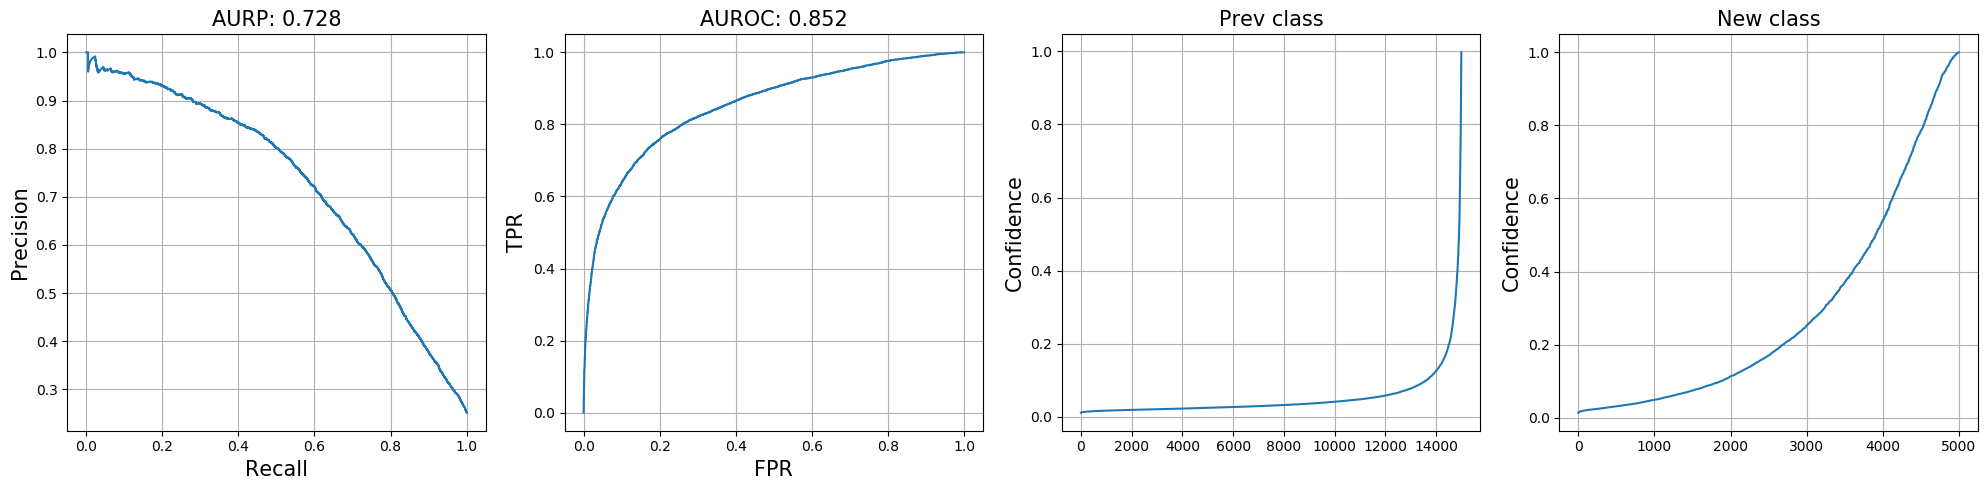

In [19]:
result = sio.loadmat(root+'191225_Imagenet_ood_0_memsz_20000_alpha_10.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, uniform penalty, CI loss, alpha: 10')

idx = 2

print('AUROC')
print(result['auroc'][0])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx, save = 'OOD_results')

In [20]:
result = sio.loadmat(root+'191225_Imagenet_ood_0_memsz_20000_alpha_0.05_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_GCE.mat')
print('Batch: 128, GCE loss, alpha: 1/20')
print(result['task_soft_1'][0])

result = sio.loadmat(root+'191225_Imagenet_ood_0_memsz_20000_alpha_0.1_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer.mat')
print('Batch: 128, GCE loss, alpha: 1/10')
print(result['task_soft_1'][0])

result = sio.loadmat(root+'191225_Imagenet_ood_0_memsz_20000_alpha_0.2_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer.mat')
print('Batch: 128, GCE loss, alpha: 1/5')
print(result['task_soft_1'][0])

result = sio.loadmat(root+'191225_Imagenet_ood_0_memsz_20000_alpha_0.25_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer.mat')
print('Batch: 128, GCE loss, alpha: 1/4')
print(result['task_soft_1'][0])

Batch: 128, GCE loss, alpha: 1/20
[84.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Batch: 128, GCE loss, alpha: 1/10
[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Batch: 128, GCE loss, alpha: 1/5
[66.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Batch: 128, GCE loss, alpha: 1/4
[65.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4
AUROC
[0.80167708 0.82094705 0.81586621]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [53. 84.  0.  0.  0.  0.  0.  0.  0.  0.]
 [44. 53. 84.  0.  0.  0.  0.  0.  0.  0.]
 [42. 45. 55. 84.  0.  0.  0.  0.  0.  0.]]
0.59386003
0.86578304


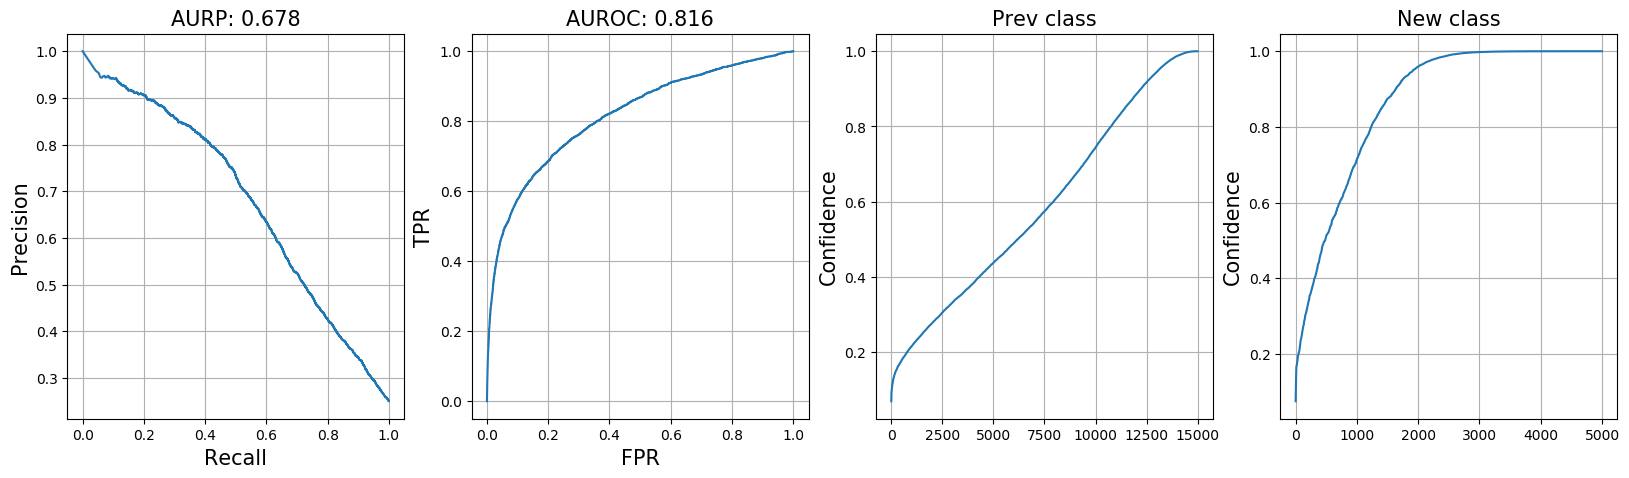

In [21]:
result = sio.loadmat(root+'191229_Imagenet_ood_0_memsz_20000_alpha_1_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4')

idx = 2

print('AUROC')
print(result['auroc'][0])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, GCE loss, alpha:0.1
AUROC
[0.7760318  0.80827867 0.81284359]
[[83.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [24. 80.  0.  0.  0.  0.  0.  0.  0.  0.]
 [13. 28. 82.  0.  0.  0.  0.  0.  0.  0.]
 [10. 18. 27. 82.  0.  0.  0.  0.  0.  0.]]
0.23768602
0.67267424


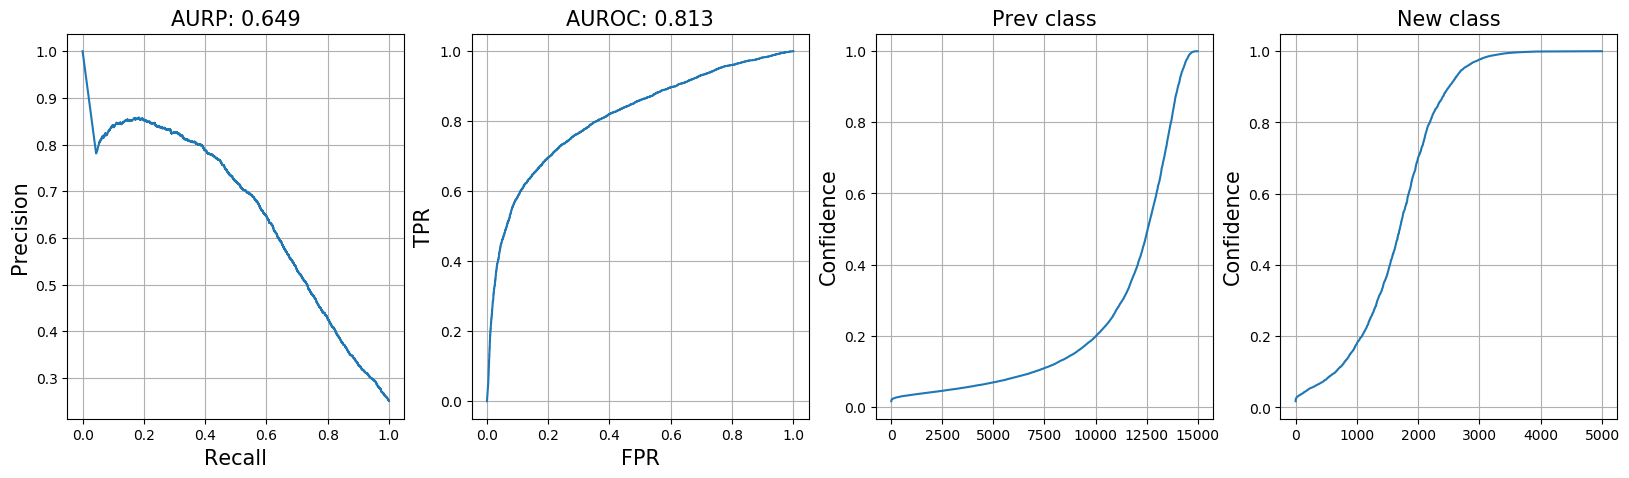

In [22]:
result = sio.loadmat(root+'191229_Imagenet_ood_0_memsz_20000_alpha_0.1_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_GCE.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, GCE loss, alpha:0.1')

idx=2

print('AUROC')
print(result['auroc'][0])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, GCE loss, uniform penalty, alpha: 0.1
AUROC
[0.73832334 0.71964233 0.70417165]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [17. 64.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 9. 16. 57.  0.  0.  0.  0.  0.  0.  0.]
 [ 7. 11. 17. 51.  0.  0.  0.  0.  0.  0.]]
0.05407457
0.2344018


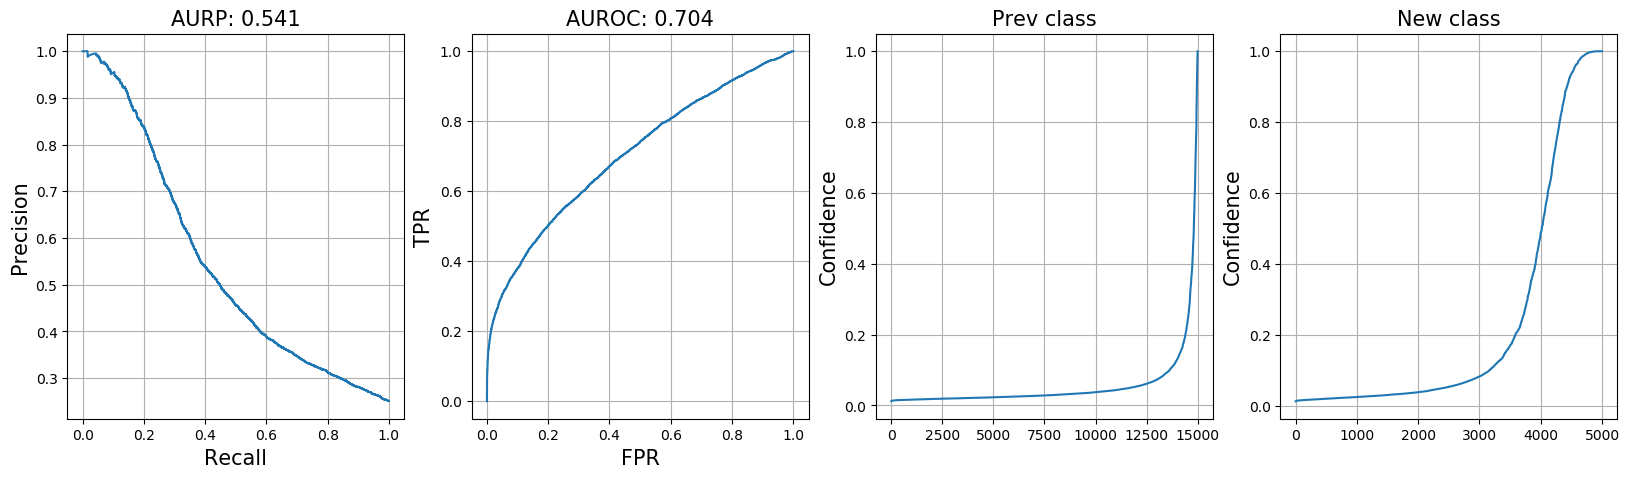

In [23]:
result = sio.loadmat(root+'191229_Imagenet_ood_0_memsz_20000_alpha_0.1_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_GCE_uniform_penalty.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, GCE loss, uniform penalty, alpha: 0.1')

idx=2

print('AUROC')
print(result['auroc'][0])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:1, CI loss, uniform penalty, alpha: 5, rand_init
AUROC
[0.81710648 0.83988127 0.836256  ]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [42. 84.  0.  0.  0.  0.  0.  0.  0.  0.]
 [34. 39. 86.  0.  0.  0.  0.  0.  0.  0.]
 [28. 30. 41. 84.  0.  0.  0.  0.  0.  0.]]
0.63576704
0.90112215


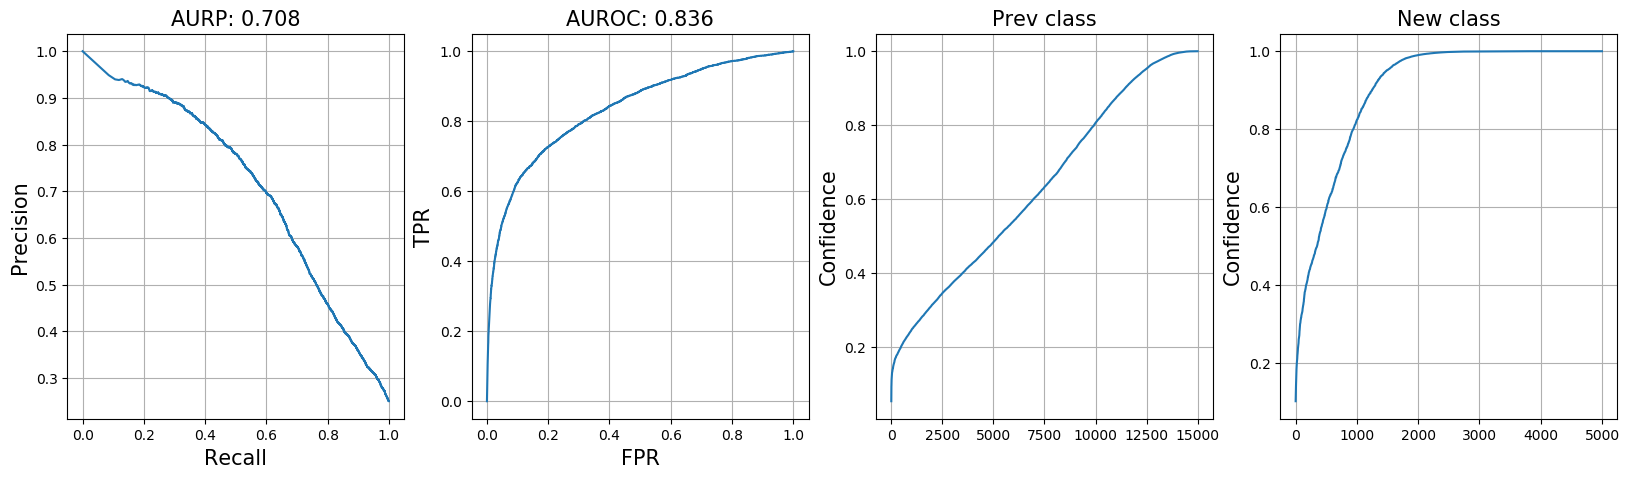

In [24]:
result = sio.loadmat(root+'191231_Imagenet_ood_0_memsz_20000_alpha_5.0_base_100_replay_32_batch_128_epoch_100_factor_1_RingBuffer_CE_uniform_penalty_CI_rand_init.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:1, CI loss, uniform penalty, alpha: 5, rand_init')

idx=2

print('AUROC')
print(result['auroc'][0])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
Batch: 128, Replay batch: 32, factor:4, CI loss, uniform penalty, alpha: 20
AUROC
[0.79561814 0.82046895 0.81866428]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [54. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [43. 54. 84.  0.  0.  0.  0.  0.  0.  0.]
 [40. 45. 53. 84.  0.  0.  0.  0.  0.  0.]]
0.5921154
0.8670764


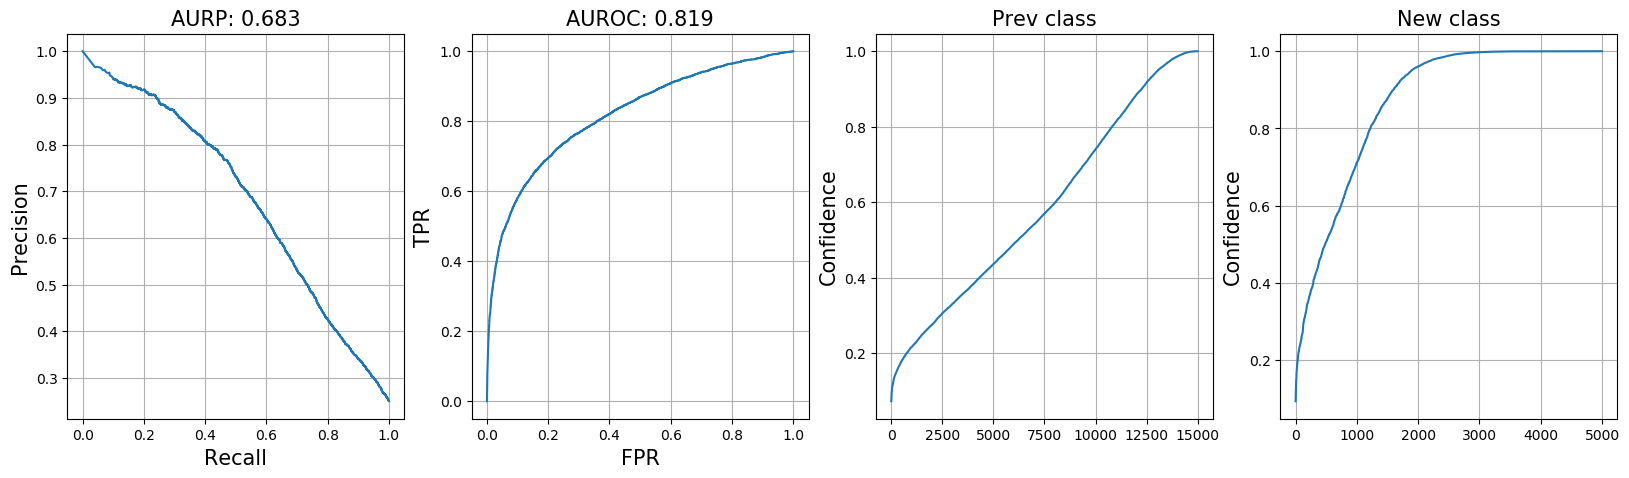

In [25]:
result = sio.loadmat(root+'191231_Imagenet_ood_0_memsz_20000_alpha_20.0_base_100_replay_32_batch_128_epoch_100_factor_4_RingBuffer_CE_uniform_penalty_CI.mat')
print(result.keys())
print('Batch: 128, Replay batch: 32, factor:4, CI loss, uniform penalty, alpha: 20')

idx=2

print('AUROC')
print(result['auroc'][0])
print(result['task_soft_1'][:idx+2])

aupr_auroc_prev_new(result, idx)